# Exercise 7 Force computation with Lennard-Jones:

The Lennard-Jones potential $U_{LJ}(\vec{r}_{ab})$ can be used to compute pairwise interactions between molecular beads $a$ and $b$ in a molecular-dynamics simulation.


Where $\vec{r}_{ab}=\vec{r}_{b}-\vec{r}_{a}$. For this exercise, assume $\epsilon = \sigma = 1.0$. Remember that $\vec{F} = -\nabla U$. The calculated forces should be repulsive for distances smaller than $\sqrt[6]{2} \sigma$, attractive for larger distances. \textbf{Note:} Molecular dynamics typically are too computation-heavy to be performed in Python, but plotting potentials and resulting forces is a common enough task.


Perform the following tasks:


1. Write a function that takes the distance of two particles (*a* and *b*) in $\mathbb{R}^3$ as input and returns $U_{LJ}$. The particles should be no closer than $0.01\sigma$. Check that this is indeed the case (use an assert statement).
2. Write in a Markdown cell an explanation for why a check like this might be important. The value of $0.01\sigma$ is arbitrary, but can you think about a case that might cause problems?
3. Write a function that computes the force magnitude acting on particles at distance $r$, from a numerical derivative of $U(r)$. Do so by using $\texttt{scipy.misc.derivative}$ to compute the derivative of the potential. Hint: Guidelines to import scipy modules can be found at: "https://docs.scipy.org/doc/scipy/reference/"
4. $\texttt{scipy.misc.derivative}$ takes an argument $\texttt{dx}$. Write in a Markdown cell an explanation for why you should pay attention to this parameter. 
6. Plot $10*U_{LJ}(r)$ and $F_{LJ}(r)$ in a proper range ([1,2] should be fine), draw an horizontal line at 0, and a vertical line at the potential energy minimum. Hint: Use scipy.optimize.minimize


In [1]:
import scipy as spy
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
r = random.uniform(0.02, 2)

def Ulj(r):
    assert r >= 0.01, "invalid input r < 0.01"
    u = 4*((1/r)**12-(1/r)**6)
    return u

def F(r):
    return spy.misc.derivative(Ulj, r, dx=1e-6)


Bei inputs kleiner als 0.01 wird die Summe von Polynomen verschiedener Ordnung ungenau.
Hier gibt Python für r = 0.001 U = 1e+36 und vernachlässigt den Term zur sechsten Ordnung.

Das Argument dx bestimmt die Präzision mit der die Ableitung berrechnet wird.
Es sollte in Relation zur Reichweite des Arguments der Funktion stehen bzw genügend klein gewählt werden. 

In [3]:
x = np.arange(1, 2, 0.01)
data1 = []
data2 = []
for i in x:
    data1.append(10 * Ulj(i))
    data2.append(F(i))
min = spy.optimize.minimize(Ulj, 1.1)


C:\Users\Xeonis7\AppData\Local\Temp\ipykernel_2188\1421400981.py:9: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return spy.misc.derivative(Ulj, r, dx=1e-6)


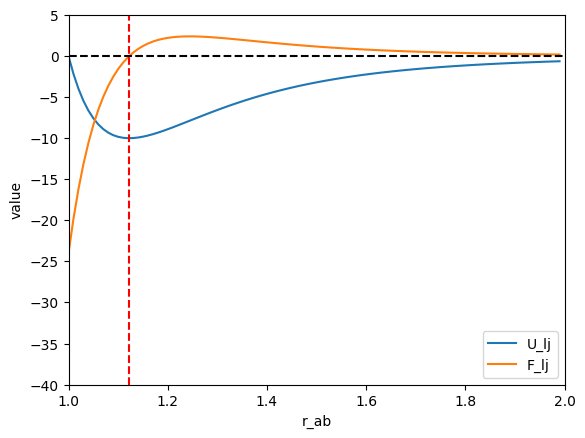

In [4]:
#plotting
fig, ax = plt.subplots()
ax.plot(x, data1)
ax.plot(x, data2)

ax.axhline(0, color = "black", linestyle = "--")
ax.axvline(min.x, color = "red", linestyle = "--")

ax.set_xlim(1,2)
ax.set_ylim(-40,5)
ax.set_xlabel("r_ab")
ax.set_ylabel("value")
ax.legend(["U_lj", "F_lj"])


# Exercise 8 Mass-Spring system with dampening

Assume you are given a point-mass $m$ hanging off the ceiling from a spring with spring constant $k$. Gravity will act on it, and, depending on the initial position $x$, it will bounce up and down. Assume here that $x$ is the perturbation from its resting length, with positive $x$ meaning that the spring is extended, and negative $x$ that the spring is shortened.
The corresponding differential equation looks as follows:

\begin{equation}
	\ddot{x} = -\left(\frac{b}{m}\right)\dot{x} -\left(\frac{k}{m}\right) x + g
\end{equation}   

Take care of the following tasks:

1. Set all parameters of the system ($x_0, \dot{x}_0, m, k, b$) according to: \\
	$x_0 = 0.0, \dot{x}_0 = 0.0, m=1.0, k=10.0$ and $b = [-0.2, 0.0, 0.2]$.\\
    $g \cong 9.81$ is the gravitational pull. 
2. Using $\texttt{scipy.integrate.odeint}$, solve the differential equation for $x(t)$ and $\dot{x}(t)$ for $t \in [0; 15.0]$ for all three different values of $b$. Hint: You can pass a list $[x_0, \dot{x}_0]$ int $\texttt{scipy.integrate.odeint}$ instead of a single starting value $x_0$. If you do so, the function you plug in must take in a list $[x, \dot{x}]$ and return a list $[\dot{x}, \ddot{x}]$ as well. In fact, you can return $[\dot{x}_{new}, \ddot{x}_{new}]$ in this form for the updated values. $\texttt{odeint}$ will then return a list $\textrm{state}$ such that $x = \textrm{state}[:,0]$ and $\dot{x} = \textrm{state}[:,1]$. See below for a possible example.
3. Identify the influence of $b$ upon the system by plotting $x(t)$ and $\dot{x}(t)$ for $t \in [0; 15.0]$ into their own separate subplots. Give your recount of what $b$ does.

In [5]:
def ddx(state, t, b, m):
    """Harmonic Oszillator"""
    x, dx = state
    f = dx, -(b/m)*dx-(10/m)*x + 9.81
    return f

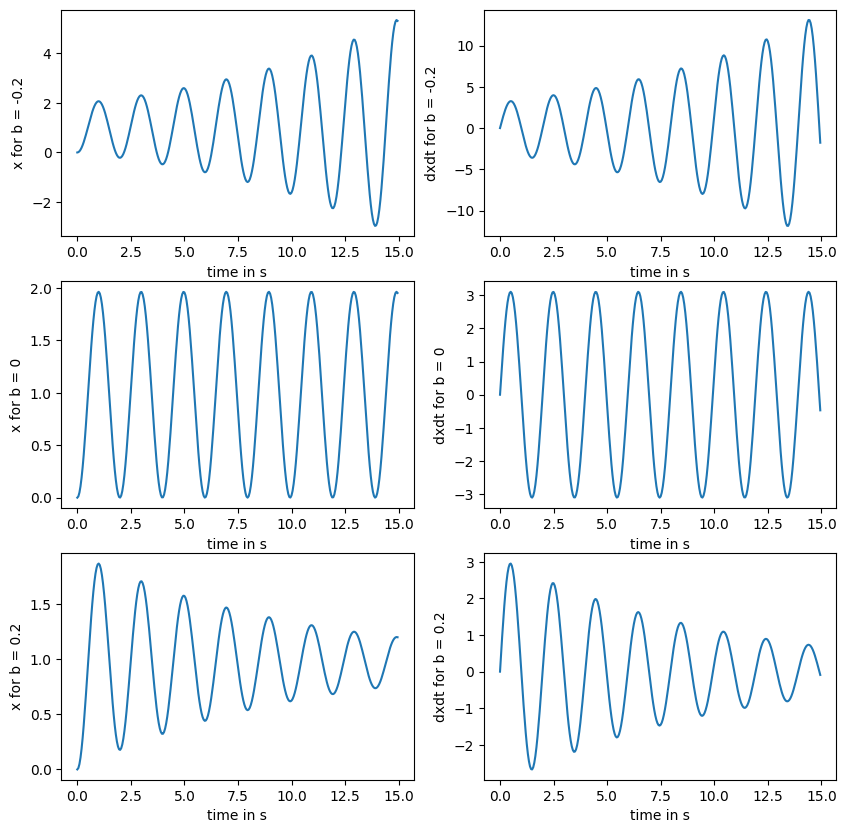

In [6]:
#initial conditions and parameters
m = 1
state = [0, 0]
bl = [-0.2, 0, 0.2]
t = np.arange(0,15,0.05)

#list of 2dim arrays with new x and dxdt for each b
data = []
for i in range(len(bl)):
    b = bl[i]
    data.append(spy.integrate.odeint(ddx, state, t, args=(b, m)))

#plotting
arg = "x", "dxdt"
fig, ax = plt.subplots(3,2, figsize = (10,10))
for i in range(3):
    for j in range(2):
        ax[i,j].plot(t, (data[i])[:,j])
        ax[i,j].set_xlabel("time in s")
        ax[i,j].set_ylabel((arg[j] + " for b = " + str(bl[i])))

b basically acts as an air resistance coefficient. When it's positive it breaks the system, when it's negative it accelerates it.